In [1]:
import time
import datetime
import numpy as np
from datetime import datetime as dt
from tqdm import *
from datetime import datetime as dt
from tqdm import *
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
import os,sys
sys.path.append('../xlib/src/')
sys.path.append('../xlib/src/expriment')
sys.path.append('../xlib/src/xtrainer/')

In [2]:
from dataprepare import *
from dataset_monitor import dataset_monitor_value_period
df, x_cols, y_cols, label_cols, label_restore_names = dataset_monitor_value_period()
_date = ['2017-10-30 00:00:00','2017-11-18 00:00:00','2017-11-18 00:00:00','2017-11-19 00:00:00','2017-11-18 00:00:00','2017-11-19 00:00:00']
dp = TimeWindowDataPrepare(df, x_cols, y_cols, label_cols[0], _date)

Load rawdata from disk done. path=../xlib/src/xdata/../../data/gas_censor.pkl
eval feature done. start to transform to dataframe..
raw_value_009A13 StaticFeature(009A13) ['SensorID', 'Time']
previous_value_009A13_1 Ref(StaticFeature(009A13),1) ['SensorID', 'Time']
previous_value_009A13_2 Ref(StaticFeature(009A13),2) ['SensorID', 'Time']
previous_value_009A13_3 Ref(StaticFeature(009A13),3) ['SensorID', 'Time']
previous_value_009A13_4 Ref(StaticFeature(009A13),4) ['SensorID', 'Time']
previous_diff_value_009A13_1 Sub(StaticFeature(009A13),Ref(StaticFeature(009A13),1)) ['SensorID', 'Time']
previous_diff_value_009A13_2 Sub(StaticFeature(009A13),Ref(StaticFeature(009A13),2)) ['SensorID', 'Time']
raw_value_044A02 StaticFeature(044A02) ['SensorID', 'Time']
previous_value_044A02_1 Ref(StaticFeature(044A02),1) ['SensorID', 'Time']
previous_value_044A02_2 Ref(StaticFeature(044A02),2) ['SensorID', 'Time']
previous_value_044A02_3 Ref(StaticFeature(044A02),3) ['SensorID', 'Time']
previous_value_044A

In [64]:
path_prefix = './pred'
df_list = []
for i in range(0,1000):
    path = '%s/%s.csv' % (path_prefix, i)
    if os.path.exists(path):
        df = pd.read_csv(path)
        df_list.append(df)

In [108]:
res = []
times = []
for df in df_list:
    res.append(df['temp_pred'].values.reshape((1,-1)))
#     print(df['Unnamed: 0'])
    times.append(df['Unnamed: 0'].apply(lambda x : pd.Timestamp(x)).values.reshape((1,-1)))
res_array = np.concatenate(res)
times_array = np.concatenate(times)

In [109]:
res_array.shape,times_array.shape

((721, 10), (721, 10))

In [110]:
res_df = pd.DataFrame(index=times_array[:,0], data=res_array)

In [111]:
res_array.tofile('%s/pred.bin' % path_prefix)

In [118]:
res_df.to_csv('%s/ARMA_20171118_20171119_10period_044A02.csv' % path_prefix)

In [114]:
label = dp.data[dp.final_label].reset_index(level=0, drop=True)
train_start, train_end, valid_start, valid_end, test_start, test_end = [pd.Timestamp(d) for d in dp.date]
train_label = label.loc[train_start:train_end]
valid_label = label.loc[valid_start:valid_end]
all_label = label.loc[train_start:valid_end]

In [115]:
def cal_mae(label, pred):
    return np.sum(np.abs(label - pred)) / label.size

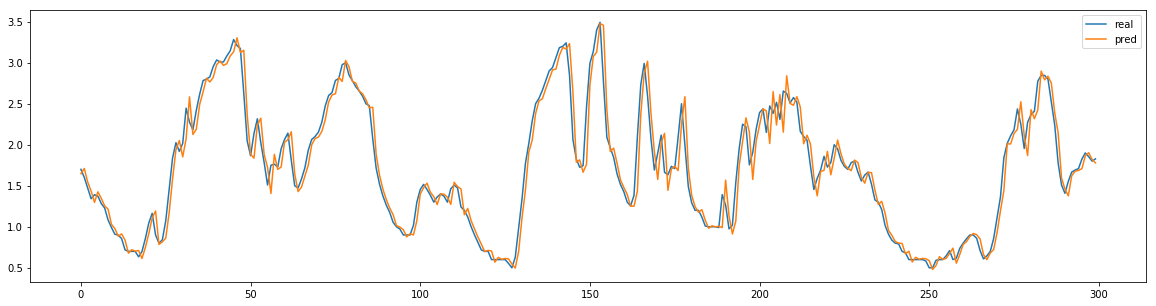

0.12722511493850638


In [119]:
init_inter = 60 #注意这个是为了与multi-lstm模型中使用的train_step想对应的值
start = 60 + init_inter
end = start + 300
logits = res_array[:,0][start:end]
label = valid_label.values[start:end]
plt.figure(figsize=(20, 5))
plt.plot(label,label='real')
plt.plot(logits,label='pred')
plt.legend()
plt.show()
print(cal_mae(label, logits))